![](http://i67.tinypic.com/2jcbwcw.png)


###  Homework

### 1. Read __'diabetesdata.csv'__ file into a pandas dataframe. Analyze the data features, check for NaN values. 
About the data: 

1. __TimesPregnant__: Number of times pregnant 
2. __glucoseLevel__: Plasma glucose concentration a 2 hours in an oral glucose tolerance test 
3. __BP__: Diastolic blood pressure (mm Hg)  
5. __insulin__: 2-Hour serum insulin (mu U/ml) 
6. __BMI__: Body mass index (weight in kg/(height in m)^2) 
7. __pedigree__: Diabetes pedigree function 
8. __Age__: Age (years) 
9. __IsDiabetic__: 0 if not diabetic or 1 if diabetic) 

### 2. Preprocess data to replace NaN values in a feature(if any) using mean of the feature.  
### Train  logistic regression, SVM, perceptron, kNN, xgboost and random forest models using this preprocessed data with 20% test split.Report training and test accuracies.

In [83]:
# No warnings
#import warnings
#warnings.filterwarnings('ignore') # Filter out warnings

# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB # Gaussian Naive Bays
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier #stochastic gradient descent
from sklearn.tree import DecisionTreeClassifier

import xgboost as xgb

# Plot styling
sns.set(style='white', context='notebook', palette='deep')
plt.rcParams[ 'figure.figsize' ] = 9 , 5

In [84]:
# Special distribution plot (will be used later)
def plot_distribution( df , var , target , **kwargs ):
    row = kwargs.get( 'row' , None )
    col = kwargs.get( 'col' , None )
    facet = sns.FacetGrid( df , hue=target , aspect=4 , row = row , col = col )
    facet.map( sns.kdeplot , var , shade= True )
    facet.set( xlim=( 0 , df[ var ].max() ) )
    facet.add_legend()
    plt.tight_layout()

In [85]:
data = pd.read_csv('diabetesdata.csv')

print(data.describe())



       TimesPregnant  glucoseLevel          BP     insulin         BMI  \
count     768.000000    734.000000  768.000000  768.000000  768.000000   
mean        3.845052    121.016349   69.105469   79.799479   31.992578   
std         3.369578     31.660240   19.355807  115.244002    7.884160   
min         0.000000      0.000000    0.000000    0.000000    0.000000   
25%         1.000000     99.000000   62.000000    0.000000   27.300000   
50%         3.000000    117.000000   72.000000   30.500000   32.000000   
75%         6.000000    141.000000   80.000000  127.250000   36.600000   
max        17.000000    199.000000  122.000000  846.000000   67.100000   

         Pedigree         Age  IsDiabetic  
count  768.000000  735.000000  768.000000  
mean     0.471876   33.353741    0.348958  
std      0.331329   11.772944    0.476951  
min      0.078000   21.000000    0.000000  
25%      0.243750   24.000000    0.000000  
50%      0.372500   29.000000    0.000000  
75%      0.626250   41.00

In [86]:
print(data.isnull().sum())

data.fillna(data.mean(),inplace=True)

print(data.isnull().sum())

print(data.info())

TimesPregnant     0
glucoseLevel     34
BP                0
insulin           0
BMI               0
Pedigree          0
Age              33
IsDiabetic        0
dtype: int64
TimesPregnant    0
glucoseLevel     0
BP               0
insulin          0
BMI              0
Pedigree         0
Age              0
IsDiabetic       0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 8 columns):
TimesPregnant    768 non-null int64
glucoseLevel     768 non-null float64
BP               768 non-null int64
insulin          768 non-null int64
BMI              768 non-null float64
Pedigree         768 non-null float64
Age              768 non-null float64
IsDiabetic       768 non-null int64
dtypes: float64(4), int64(4)
memory usage: 48.1 KB
None


In [87]:
from sklearn.utils import shuffle
data = shuffle(data).reset_index(drop=True)



In [88]:
from sklearn.model_selection import train_test_split

X_data = data.iloc[:,:-1] 
Y_data = data['IsDiabetic'] 
    
print("Feature vector shape=", X_data.shape)
print("Class shape=", Y_data.shape)

Feature vector shape= (768, 7)
Class shape= (768,)


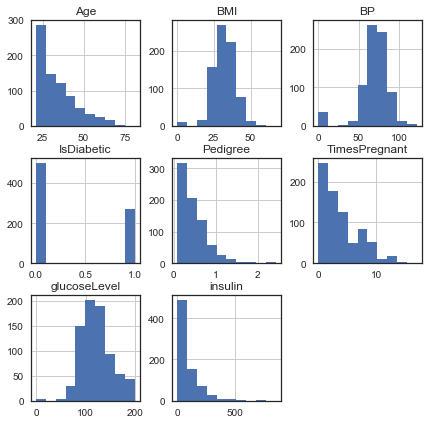

In [89]:
data.hist(figsize=(7,7))
plt.show()

In [90]:
x_train, x_test, y_train, y_test = train_test_split(X_data, Y_data, test_size = 0.2 , random_state=100)

In [91]:
# Logistic Regression

logreg = LogisticRegression()
logreg.fit(x_train, y_train)
y_pred_log = logreg.predict(x_test)

acc_log_train = round(logreg.score(x_train, y_train) * 100, 2)
print("Train accuracy: ",acc_log_train)

acc_log_test = round(logreg.score(x_test,y_test) * 100, 2)
print("Test accuracy: ",acc_log_test)

Train accuracy:  78.01
Test accuracy:  75.97


In [92]:
# Support Vector Machines

svc = SVC()
svc.fit(x_train, y_train)
y_pred_svm = svc.predict(x_test)

acc_svc_train = round(svc.score(x_train, y_train) * 100, 2)
print("Train accuracy: ",acc_svc_train)

acc_svc_test = round(svc.score(x_test,y_test) * 100, 2)
print("Test accuracy: ",acc_svc_test)

Train accuracy:  100.0
Test accuracy:  62.99


In [93]:
#K Nearest Neighbors

knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(x_train, y_train)
y_pred_knn = knn.predict(x_test)

acc_knn_train = round(knn.score(x_train, y_train) * 100, 2)
print("Train accuracy: ",acc_knn_train)

acc_knn_test = round(knn.score(x_test,y_test) * 100, 2)
print("Test accuracy: ",acc_knn_test)

Train accuracy:  84.04
Test accuracy:  70.78


In [94]:
# Perceptron

perceptron = Perceptron()
perceptron.fit(x_train, y_train)
y_pred_prc = perceptron.predict(x_test)

acc_perceptron_train = round(perceptron.score(x_train, y_train) * 100, 2)
print("Train accuracy: ",acc_perceptron_train)

acc_perceptron_test = round(perceptron.score(x_test,y_test) * 100, 2)
print("Test accuracy: ",acc_perceptron_test)

Train accuracy:  54.56
Test accuracy:  50.0


C:\Anaconda\envs\Data-X\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:84: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.perceptron.Perceptron'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


In [95]:
# XGBoost

gradboost = xgb.XGBClassifier(n_estimators=1000)
gradboost.fit(x_train, y_train)
y_pred_xgb = gradboost.predict(x_test)

acc_gradboost_train = round(gradboost.score(x_train, y_train) * 100, 2)
print("Train accuracy: ",acc_gradboost_train)

acc_gradboost_test = round(gradboost.score(x_test,y_test) * 100, 2)
print("Test accuracy: ",acc_gradboost_test)

Train accuracy:  100.0
Test accuracy:  70.13


In [96]:
# Random Forest

random_forest = RandomForestClassifier(n_estimators=1000)
random_forest.fit(x_train, y_train)
y_pred_rnf = random_forest.predict(x_test)
random_forest.score(x_train, y_train)

acc_random_forest_train = round(random_forest.score(x_train, y_train) * 100, 2)
print("Train accuracy: ",acc_random_forest_train)

acc_random_forest_test = round(random_forest.score(x_test,y_test) * 100, 2)
print("Test accuracy: ",acc_random_forest_test)

Exception ignored in: <bound method DMatrix.__del__ of <xgboost.core.DMatrix object at 0x00000265F57D5A20>>
Traceback (most recent call last):
  File "C:\Anaconda\envs\Data-X\lib\site-packages\xgboost\core.py", line 324, in __del__
    _check_call(_LIB.XGDMatrixFree(self.handle))
AttributeError: 'DMatrix' object has no attribute 'handle'


Train accuracy:  100.0
Test accuracy:  75.97


1.0


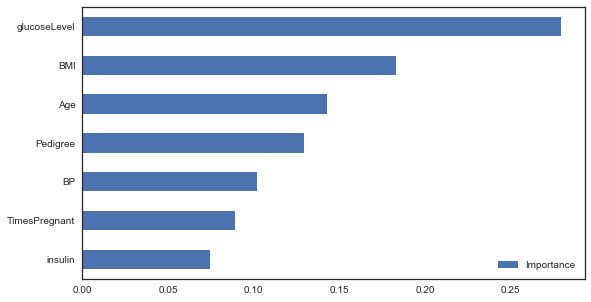

In [97]:
# Look at importnace of features for random forest

def plot_model_var_imp( model , X , y ):
    imp = pd.DataFrame( 
        model.feature_importances_  , 
        columns = [ 'Importance' ] , 
        index = X.columns 
    )
    imp = imp.sort_values( [ 'Importance' ] , ascending = True )
    imp[ : 10 ].plot( kind = 'barh' )
    print (model.score( X , y ))

plot_model_var_imp(random_forest, x_train, y_train)

### 3. What is the  ratio of diabetic persons in 3 equirange bands of 'BMI' and 'Pedigree' in the provided dataset. 
### Convert these features - 'BP','insulin','BMI' and 'Pedigree'   into categorical values by mapping different bands of values of these features to integers 0,1,2.
HINT: USE pd.cut with bin=3 to create 3 bins

In [98]:
data['BMI_Groups'] = pd.cut(data['BMI'], 3)
data['Pedigree_Groups'] = pd.cut(data['Pedigree'], 3)

data.head()

TimesPregnant  glucoseLevel  BP  insulin   BMI  Pedigree   Age  IsDiabetic  \
0              4         173.0  70      168  29.7     0.361  33.0           1   
1             11         120.0  80      150  42.3     0.785  48.0           1   
2              1         143.0  86      330  30.1     0.892  23.0           0   
3              5         132.0  80        0  26.8     0.186  69.0           0   
4              8          99.0  84        0  35.4     0.388  50.0           0   

         BMI_Groups  Pedigree_Groups  
0  (22.367, 44.733]  (0.0757, 0.859]  
1  (22.367, 44.733]  (0.0757, 0.859]  
2  (22.367, 44.733]   (0.859, 1.639]  
3  (22.367, 44.733]  (0.0757, 0.859]  
4  (22.367, 44.733]  (0.0757, 0.859]

In [99]:
data_cat = data.copy()

data_cat['BP']=pd.cut(data['BP'],[-np.inf,(data_cat['BP'].max())*1/3,(data_cat['BP'].max())*2/3,np.inf], 3,
           labels=[0,1,2])

data_cat['insulin']=pd.cut(data['insulin'],[-np.inf,(data_cat['insulin'].max())*1/3,(data_cat['insulin'].max())*2/3,np.inf], 3,
           labels=[0,1,2])

data_cat['BMI']=pd.cut(data['BMI'],[-np.inf,(data_cat['BMI'].max())*1/3,(data_cat['BMI'].max())*2/3,np.inf], 3,
           labels=[0,1,2])

data_cat['Pedigree']=pd.cut(data['Pedigree'],[-np.inf,(data_cat['Pedigree'].max())*1/3,(data_cat['Pedigree'].max())*2/3,np.inf], 3,
           labels=[0,1,2])

In [100]:
# BMI ratio by equirange band

low_band = (data_cat["BMI"] == 0).sum()
mid_band = (data_cat["BMI"] == 1).sum()
high_band = (data_cat["BMI"] == 2).sum()

print("Ratio of diabetic persons in 3 equirange bands for BMI:", str(low_band)+":"+str(mid_band)+":"+str(high_band))


Ratio of diabetic persons in 3 equirange bands for BMI: 51:681:36


In [101]:
# Pedigree ratio by equirange band
low_band_p = (data_cat["Pedigree"] == 0).sum()
mid_band_p = (data_cat["Pedigree"] == 1).sum()
high_band_p = (data_cat["Pedigree"] == 2).sum()

print("Ratio of diabetic persons in 3 equirange bands for Pedigree:", str(low_band_p)+":"+str(mid_band_p)+":"+str(high_band_p))

Ratio of diabetic persons in 3 equirange bands for Pedigree: 667:92:9


### 4. Now consider the original dataset again, instead of generalizing the NAN values with the mean of the feature we will try assigning values to NANs based on some hypothesis. For example for age we assume that the relation between BMI and BP of people is a reflection of the age group.We can have 9 types of BMI and BP relations and our aim is to find the median age of each of that group:

Your Age guess matrix will look like this:  

| BMI | 0       | 1      | 2  |
|-----|-------------|------------- |----- |
| BP  |             |              |      |
| 0   | a00         | a01          | a02  |
| 1   | a10         | a11          | a12  |
| 2   | a20         | a21          |  a22 |


Create a guess_matrix  for NaN values of *'Age'* ( using 'BMI' and 'BP')  and  *'glucoseLevel'*  (using 'BP' and 'Pedigree') for the given dataset and assign values accordingly to the NaNs in 'Age' or *'glucoseLevel'* .


Refer to how we guessed age in the titanic notebook in the class.


In [103]:
data = pd.read_csv('diabetesdata.csv')

guess_ages = np.zeros((3,3),dtype=int) #initialize
guess_ages

array([[0, 0, 0],
       [0, 0, 0],
       [0, 0, 0]])

In [104]:
bins = 3
labels = [0, 1, 2]

data['BP'] = pd.cut(data['BP'], bins, labels = labels)
data['BMI'] = pd.cut(data['BMI'], bins, labels = labels)
data['Pedigree'] = pd.cut(data['Pedigree'], bins, labels = labels)

In [105]:
# Fill the NA's for the Age columns
# with "qualified guesses"
combine = [data]

for idx,dataset in enumerate(combine):
    if idx == 0:
        print("Working on data...\n")
    
    print('Guess values of age based on BP and BMI...')
    for i in range(0, 3):
        for j in range(0,3):
            
            guess_df = dataset[(dataset.BMI == i) & (dataset.BP == j)]['Age'].dropna()

            age_guess = guess_df.median()
          
            guess_ages[i,j] = int(age_guess)
    
            
    print('Guess_Age table:\n',guess_ages)
    print ('\nAssigning age values to NAN age values in the dataset...')
    
    for i in range(0, 3):
        for j in range(0, 3):
            #dataset.loc[ (dataset.Age.isnull()) & (dataset.BMI == i) & (dataset.BP == j),\
             #       'Age'] = guess_ages[i,j]

            dataset.loc[ (dataset.Age.isnull()) & (dataset.BMI == i) & (dataset.BP == j),'Age'] = guess_ages[i,j]
    dataset['Age'] = dataset['Age'].astype(int)
            
            
    dataset['Age'] = dataset['Age'].astype(int)
    print()
print('Done!')
data.head()

Working on data...

Guess values of age based on BP and BMI...
Guess_Age table:
 [[24 25 55]
 [29 29 37]
 [33 32 31]]

Assigning age values to NAN age values in the dataset...

Done!


TimesPregnant  glucoseLevel BP  insulin BMI Pedigree  Age  IsDiabetic
0              6         148.0  1        0   1        0   50           1
1              1           NaN  1        0   1        0   31           0
2              8         183.0  1        0   1        0   29           1
3              1           NaN  1       94   1        0   21           0
4              0         137.0  0      168   1        2   33           1

In [106]:
# Guessing glucoseLevel using Pedigree and BP

guess_glucose = np.zeros((3,3), dtype = int)
guess_glucose


array([[0, 0, 0],
       [0, 0, 0],
       [0, 0, 0]])

In [107]:
# Fill the NA's for the glucoseLevel columns with "qualified guesses"

combine = [data]

for idx, dataset in enumerate(combine):
    if idx == 0:
        print("Working on data...\n")
        
    print('Guess values of glucoseLevel based on BP and Pedigree...')
    for i in range (0,3):
        for j in range (0,3):

            guess_df = dataset[(dataset.Pedigree == i) & (dataset.BP == j)]["glucoseLevel"].dropna()
            glucose_guess = guess_df.median()
            guess_glucose[i,j] = int(glucose_guess)
       
    print('Guess_Age table:\n', guess_glucose)
    print ('\nAssigning glucoseLevel values to NAN glucoseLevel values in the dataset...')
    
    for i in range (0,3):
        for j in range (0,3):
            dataset.loc[ (dataset.glucoseLevel.isnull()) & (dataset.Pedigree == i) & (dataset.BP == j),'glucoseLevel'] = guess_glucose[i,j]
    dataset['glucoseLevel'] = dataset['glucoseLevel'].astype(int)

print("Done!")
data.head()

Working on data...

Guess values of glucoseLevel based on BP and Pedigree...
Guess_Age table:
 [[115 112 133]
 [127 115 129]
 [137 149 159]]

Assigning glucoseLevel values to NAN glucoseLevel values in the dataset...
Done!


TimesPregnant  glucoseLevel BP  insulin BMI Pedigree  Age  IsDiabetic
0              6           148  1        0   1        0   50           1
1              1           112  1        0   1        0   31           0
2              8           183  1        0   1        0   29           1
3              1           112  1       94   1        0   21           0
4              0           137  0      168   1        2   33           1

###  5. Now, convert 'glucoseLevel' and 'Age' features also to categorical variables of 5 categories each. 
### Use this dataset (with all features in categorical form) to train perceptron, logistic regression and random forest models using 20% test split. Report training and test accuracies.

In [108]:
data_cats = data.copy()
data_cats.head()

TimesPregnant  glucoseLevel BP  insulin BMI Pedigree  Age  IsDiabetic
0              6           148  1        0   1        0   50           1
1              1           112  1        0   1        0   31           0
2              8           183  1        0   1        0   29           1
3              1           112  1       94   1        0   21           0
4              0           137  0      168   1        2   33           1

In [109]:
bins = 5
labels = [0, 1, 2, 3, 4]

data_cats['glucoseLevel'] = pd.cut(data_cats['glucoseLevel'], bins, labels = labels)
data_cats['Age'] = pd.cut(data_cats['Age'], bins, labels = labels)

In [110]:
bins = 3
labels = [0, 1, 2]

data_cats['insulin'] = pd.cut(data_cats['insulin'], bins, labels = labels)

In [111]:
data_cats.head()

TimesPregnant glucoseLevel BP insulin BMI Pedigree Age  IsDiabetic
0              6            3  1       0   1        0   2           1
1              1            2  1       0   1        0   0           0
2              8            4  1       0   1        0   0           1
3              1            2  1       0   1        0   0           0
4              0            3  0       0   1        2   0           1

In [112]:
data_cats = shuffle(data_cats).reset_index(drop = True)
data_cats.head()

TimesPregnant glucoseLevel BP insulin BMI Pedigree Age  IsDiabetic
0                0            3  1       0   1        0   0           0
1                0            3  2       0   1        0   1           0
2                2            3  0       0   1        0   0           1
3                0            2  1       0   1        0   0           0
4                2            3  2       0   1        0   0           0
5                5            3  2       0   0        0   2           0
6               10            2  1       0   1        0   2           0
7               13            3  2       0   1        0   1           1
8                8            2  1       0   1        0   0           0
9               10            4  1       0   1        0   2           1
10               6            2  1       0   1        0   0           0
11               0            2  1       0   1        0   0           1
12               8            2  1       0   1        0   3           0
13               0            4  1       0   2        1   3           0
14               3            3  1       0   0        0   2           0
15               8            2  1       0   1        0   0           1
16              11            3  1       0   1        1   2           1
17               4            3  0       0   1        0   0           1
18               4            3  1       0   1        0   1           0
19               8            3  1       0   1        0   1           1
20              14            2  1       0   1        0   2           1
21               4            3  1       0   1        0   0           0
22               0            2  0       0   0        0   0           0
23               3            3  1       1   1        0   0           0
24               8            2  1       0   1        0   2           0
25               0            3  2       0   1        0   0           0
26               1            2  1       2   1        0   3           1
27               6            2  1       0   1        0   0           0
28              13            2  1       0   1        0   1           1
29               3            2  1       0   1        0   0           0
..             ...          ... ..     ...  ..      ...  ..         ...
738              9            3  2       0   1        0   2           1
739              7            3  2       0   1        0   2           0
740              0            2  2       0   1        0   2           0
741              1            2  1       0   1        0   0           0
742              2            1  1       0   1        0   0           0
743              9            4  1       0   1        0   1           1
744              6            2  1       0   1        0   0           0
745              1            2  1       0   1        0   0           0
746              5            3  2       1   1        0   1           0
747              3            2  2       0   1        0   0           0
748              2            2  1       0   1        0   0           0
749              9            4  2       0   1        1   2           1
750              1            2  1       0   1        1   0           0
751              4            3  2       0   1        0   0           0
752              1            3  1       0   1        0   1           1
753              1            2  1       0   1        0   0           0
754              0            2  1       0   1        0   0           0
755              2            3  1       0   1        0   0           0
756              6            2  1       0   1        0   1           0
757             11            3  2       0   1        0   2           0
758              3            2  1       0   0        0   0           0
759              0            2  2       0   1        0   0           1
760              1            3  1       0   1        0   0           0
761              3            4  1       0   

In [113]:
X = data_cats.iloc[:,:-1]
X.head()

Y = data_cats["IsDiabetic"]
Y.head()

0    0
1    0
2    1
3    0
4    0
Name: IsDiabetic, dtype: int64

In [114]:
print("Feature vector shape=", X.shape)
print("Class shape=", Y.shape)# Train-test split

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=100)
print ('Number of samples in training data:', len(x_train))
print ('Number of samples in validation data:', len(x_test))

Feature vector shape= (768, 7)
Class shape= (768,)
Number of samples in training data: 614
Number of samples in validation data: 154


In [115]:
# Logistic Regression

logreg = LogisticRegression()
logreg.fit(x_train, y_train)
#y_pred = logreg.predict(x_test)

acc_log_train = round(logreg.score(x_train, y_train) * 100, 2)
print("Train accuracy:", acc_log_train)
acc_log_test = round(logreg.score(x_test, y_test) * 100, 2)
print("Test accuracy:", acc_log_test)

Train accuracy: 76.38
Test accuracy: 68.83


In [116]:
# Perceptron

perceptron = Perceptron()
perceptron.fit(x_train, y_train)
y_pred = perceptron.predict(x_test)

acc_perceptron_train = round(perceptron.score(x_train, y_train) * 100, 2)
print("Train accuracy:", acc_perceptron_train)
acc_perceptron_test = round(perceptron.score(x_test, y_test) * 100, 2)
print("Test accuracy:", acc_perceptron_test)

Train accuracy: 53.09
Test accuracy: 53.9


C:\Anaconda\envs\Data-X\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:84: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.perceptron.Perceptron'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


In [117]:
# Random Forest

random_forest = RandomForestClassifier(n_estimators = 5000)
random_forest.fit(x_train, y_train)
y_pred = random_forest.predict(x_test)

acc_random_forest_train = round(random_forest.score(x_train, y_train) * 100, 2)
print("Train accuracy:", acc_random_forest_train)
acc_random_forest_test = round(random_forest.score(x_test, y_test) * 100, 2)
print("Test accuracy:", acc_random_forest_test)

Train accuracy: 88.76
Test accuracy: 73.38
